In [1]:
import sys
sys.path.insert(0, '/home/artem/Desktop/programming/GPyOpt')

In [2]:
import GPyOpt
print(GPyOpt)

<module 'GPyOpt' from '/home/artem/Desktop/programming/GPyOpt/GPyOpt/__init__.py'>


In [3]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


In [4]:
from models.Bayesian_Optimization import BayesianOptimization

In [5]:
model, Y_best = BayesianOptimization(50, '1_Bot_4_Sim').fit()

In [6]:
model.x_opt

array([ -6.90775528,   4.60517019,  -9.15815464, -34.53877639])

In [7]:
model.fx_opt

1827.989481958416

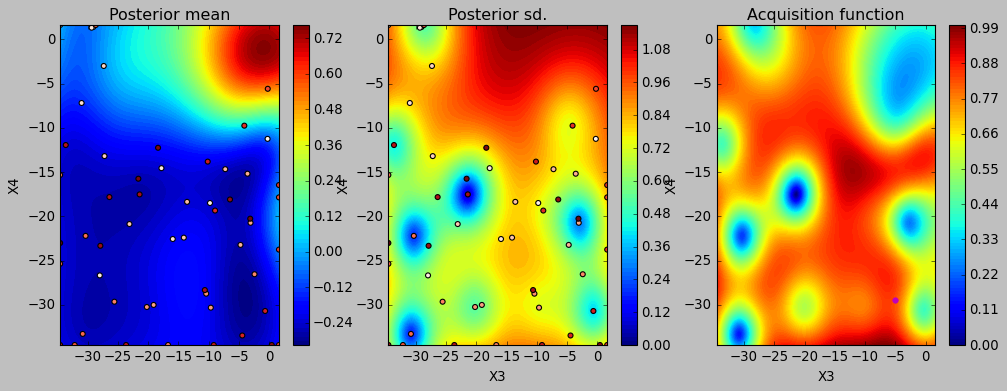

In [8]:
model.plot_acquisition(fixed_values=[-6.90775528,  -6.90775528, None, None])

In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
import deminf_data
import pickle

In [11]:
print(GPyOpt)

<module 'GPyOpt' from '/home/artem/Desktop/programming/GPyOpt/GPyOpt/__init__.py'>


In [12]:
objective = deminf_data.Objective.from_name('1_Bot_4_Sim', negate=True, type_of_transform='logarithm')

In [14]:
bounds = []
ind = 1
for l, r in zip(objective.lower_bound, objective.upper_bound):
    bounds.append({'name':f'var_{ind}', 'type':'continuous', 'domain':(l, r)})
    ind += 1

In [15]:
def f(x):
    return [objective(x[i]) for i in range(len(x))]

In [16]:
with open('compare/data/BayesianOptimization_log/1_Bot_4_Sim/log_test_run.pickle', 'rb') as fp:
    X = pickle.load(fp)
    Y = pickle.load(fp)
    Y_best = pickle.load(fp)

In [17]:
X = np.array(X)
Y = np.array(Y)
Y = Y[:, np.newaxis]
Y_best = np.array(Y_best)

In [18]:
model_test = GPyOpt.methods.BayesianOptimization(f=f,
                                                 domain=bounds,
                                                 model_type='GP',
                                                 acquisition_type='EI',
                                                 normalize_Y=True,
                                                 acquisition_weight=2,
                                                 model_update_interval=1,
                                                 verbosity=True,
                                                 X=X,
                                                 Y=Y)

In [19]:
model_test.run_optimization()

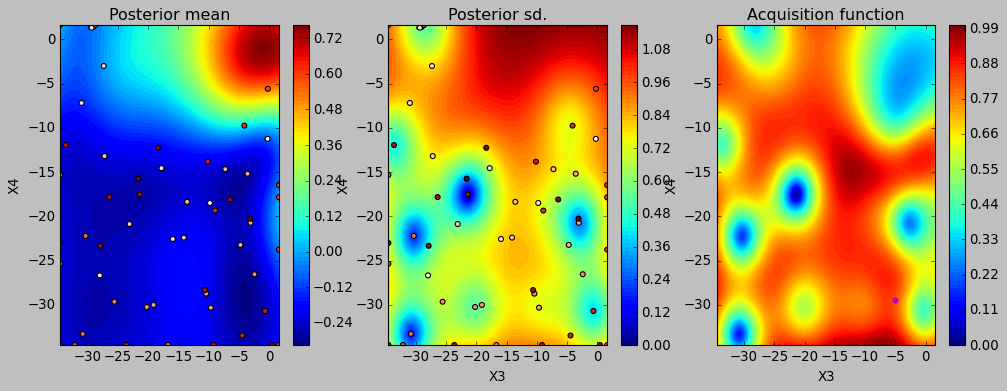

In [20]:
model_test.plot_acquisition(fixed_values=[-6.90775528,  -6.90775528, None, None])

In [21]:
model_test.fx_opt

1827.989481958416

In [22]:
model_test.x_opt

array([ -6.90775528,   4.60517019,  -9.15815464, -34.53877639])